# DATA 622 # hw2

Assigned on September 15, 2018
Due on October 6, 2019 11:59 PM EST
17 points possible, worth 17% of your final grade
Required Reading
Read Chapter 4 of the Deep Learning Book Read Chapter 5 of the Deep Learning Book Read Chapter 1 of the Agile Data Science 2.0 textbook

Data Pipeline using Python (13 points total)

Build a data pipeline in Python that downloads data using the urls given below, trains a random forest model on the training dataset using sklearn and scores the model on the test dataset.

Scoring Rubric

The homework will be scored based on code efficiency (hint: use functions, not stream of consciousness coding), code cleaniless, code reproducibility, and critical thinking (hint: commenting lets me know what you are thinking!) Instructions:

Submit the following 5 items on github. ReadMe.md (see "Critical Thinking") requirements.txt pull_data.py train_model.py score_model.py

More details:

requirements.txt (2 point) This file documents all dependencies needed on top of the existing packages in the Docker Dataquest image from HW1. When called upon using pip install -r requirements.txt , this will install all python packages needed to run the .py files. (hint: use pip freeze to generate the .txt file)

pull_data.py (5 points) When this is called using python pull_data.py in the command line, this will go to the 2 Kaggle urls provided below, authenticate using your own Kaggle sign on, pull the two datasets, and save as .csv files in the current local directory. The authentication login details (aka secrets) need to be in a hidden folder (hint: use .gitignore). There must be a data check step to ensure the data has been pulled correctly and clear commenting and documentation for each step inside the .py file. Training dataset url: https://www.kaggle.com/c/titanic/download/train.csv Scoring dataset url: https://www.kaggle.com/c/titanic/download/test.csv

train_model.py (5 points) When this is called using python train_model.py in the command line, this will take in the training dataset csv, perform the necessary data cleaning and imputation, and fit a classification model to the dependent Y. There must be data check steps and clear commenting for each step inside the .py file. The output for running this file is the random forest model saved as a .pkl file in the local directory. Remember that the thought process and decision for why you chose the final model must be clearly documented in this section. eda.ipynb (0 points)

[Optional] This supplements the commenting inside train_model.py. This is the place to provide scratch work and plots to convince me why you did certain data imputations and manipulations inside the train_model.py file.

score_model.py (2 points) When this is called using python score_model.py in the command line, this will ingest the .pkl random forest file and apply the model to the locally saved scoring dataset csv. There must be data check steps and clear commenting for each step inside the .py file. The output for running this file is a csv file with the predicted score, as well as a png or text file output that contains the model accuracy report (e.g. sklearn's classification report or any other way of model evaluation).

Critical Thinking (3 points total) Modify this ReadMe file to answer the following questions directly in place.
Kaggle changes links/ file locations/login process/ file content
We run out of space on HD / local permissions issue - can't save files
Someone updated python packages and there is unintended effect (functions retired or act differently)
Docker issues - lost internet within docker due to some ip binding to vm or local routing issues( I guess this falls under lost internet, but I am talking more if docker is the cause rather then ISP)

## I) Requirements

This txt file will list all required dependicies needed for this project.

We need to create a virtual python 3 env. pointed to the directory where the following scripts/files will live:

* pull_data.py

* train_model.py

* score_model.py

* requirements.txt

Requirements will be installed in the env. using pip install -r requirements.txt. 

The remainig scripts will run using something simialr to:

* python.exe C:\Users\traveler\Desktop\pyscript\pull_data.py

* python.exe C:\Users\traveler\Desktop\pyscript\train_model.py

* python.exe C:\Users\traveler\Desktop\pyscript\score_model.py

## II) Pull Data 

This script will find the kaggle.json file, which was generated by downloading the API token from kaggle. Once the credentials have been passed, the script will locate the titanic data and download it locally. We will re-define the data since part of this process requires model diagnostics. The test data will now be called validation while the train data will be called titanic. We will partition titanic into test and train then simulate deployment on validation.

In [2]:
import os
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi('{"username":"vindication09","key":"dd1b03f9210cced82665684af4672b29"}')
api.authenticate()
api.competition_download_files("titanic")

zf = zipfile.ZipFile('titanic.zip') # importing zip file from local path

titanic = pd.read_csv(zf.open('train.csv')) # open train.csv

validation = pd.read_csv(zf.open('test.csv')) # open test.csv

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA (Optional)

This is a file that will convince the reader as to why certain data processing methods were used. We also use this section to examine distributions and missing data analysis. 

In [76]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,classification_report,precision_score

import seaborn as sns

from IPython.display import Image  

from sklearn.externals.six import StringIO  

from sklearn.tree import export_graphviz

import pydot

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from pandasql import sqldf

from IPython.display import Image  

from sklearn.externals.six import StringIO  

from sklearn.tree import export_graphviz

import pydot

from sklearn.ensemble import RandomForestClassifier

import pickle

### EDA - Missing Data 

This will help us get a sense of what variables we should impute.

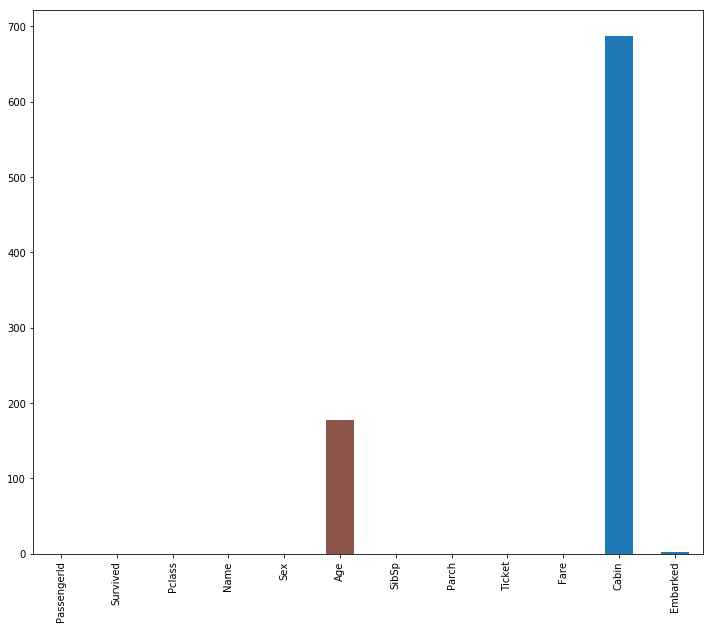

In [5]:
#missing value analysis 

titanic.isnull().sum().plot(kind="bar", figsize=(12,10))

We can see that Cabin has the highest number of missing entries followed by Age and Embarked. We do not know what percentage of the data frame is composed of missing data for each variable. 

In [6]:
missing = titanic.isna()

missing_count=missing.sum()

missing_count/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We can see that Cabin is missing over 70% of Data. Typically, this is way beyond the acepted threshold and could be eliminated, however Class is a cabin number. Without features of the cabin it's self, I do not think Cabin will be important. Cabin would be more useful if we knew deck level, size, proximity to exits etc... This is hypothetical. 

Please see this discussion where Data people discuss the right threshold for missing data 
https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456

### EDA- Distributions

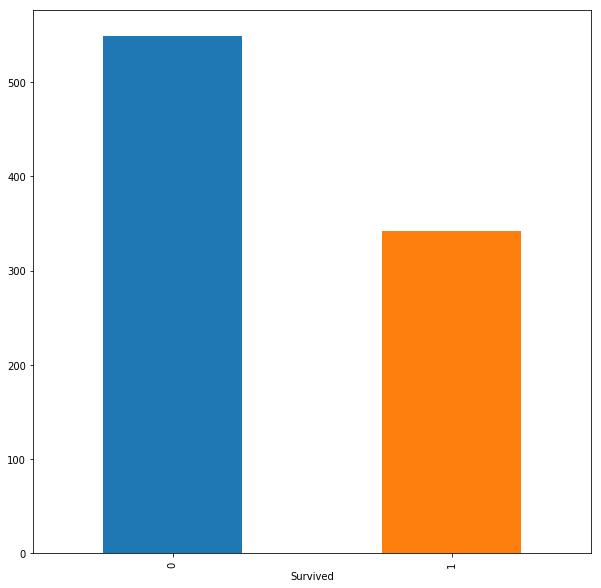

In [8]:
#Distribution of Reponse variable 

titanic.groupby("Survived").size().plot(kind='bar', figsize=(10,10))

There does not seem to be a terrible imbalance in the response variable. Lets examine the distributions of survived /not survived for categorical variables. 

Text(0,0.5,'Class')

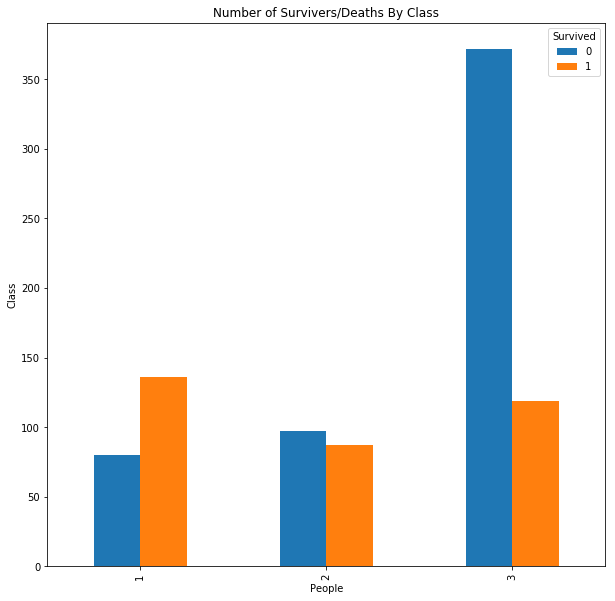

In [9]:
%matplotlib inline 

pd.crosstab(titanic['Pclass'],titanic['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Class')

plt.xlabel('People')

plt.ylabel('Class')


This plot reveals some assumption that I had regarding that upper class passengers had a greater survival rate. First class passengers had the greatest survival rate while third class passengers had the worst survival rate. This leads me to believe that class will be an important predictor. 

Text(0,0.5,'Gender')

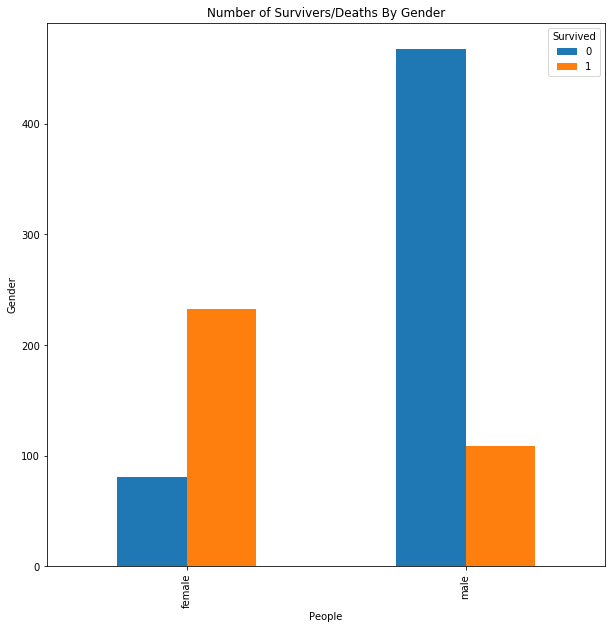

In [10]:
%matplotlib inline 

pd.crosstab(titanic['Sex'],titanic['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Gender')

plt.xlabel('People')

plt.ylabel('Gender')


Females have a much greater survival rate than males. This satisfies an assumption where "women and children" were placedin life boats first. This too could be an important predictor. 

Text(0,0.5,'Age')

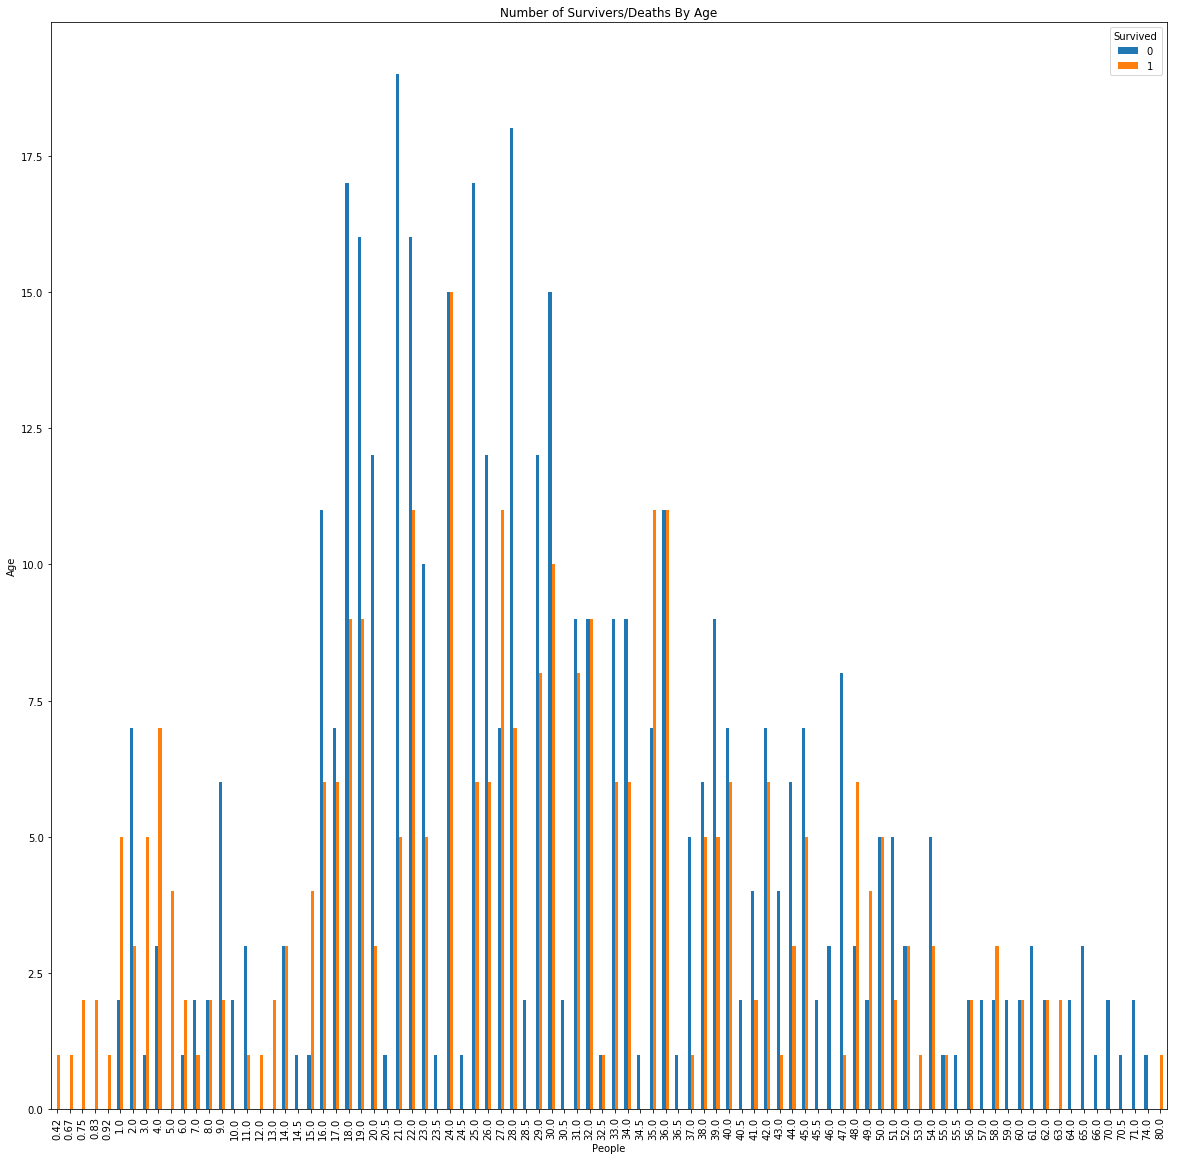

In [13]:
%matplotlib inline 

pd.crosstab(titanic['Age'],titanic['Survived']).plot(kind='bar', figsize=(20,20))

plt.title('Number of Survivers/Deaths By Age')

plt.xlabel('People')

plt.ylabel('Age')


We observe quite the variety of survival rates for each age. Itis difficult to say that the elderly had the greatest survival rate because we see instances where 80 year old people had a high survival rate vs 70 year old people who had a low survival rate. I would be interested in seeing how this changes if we isolate by gender or by class.

Text(0,0.5,'Age')

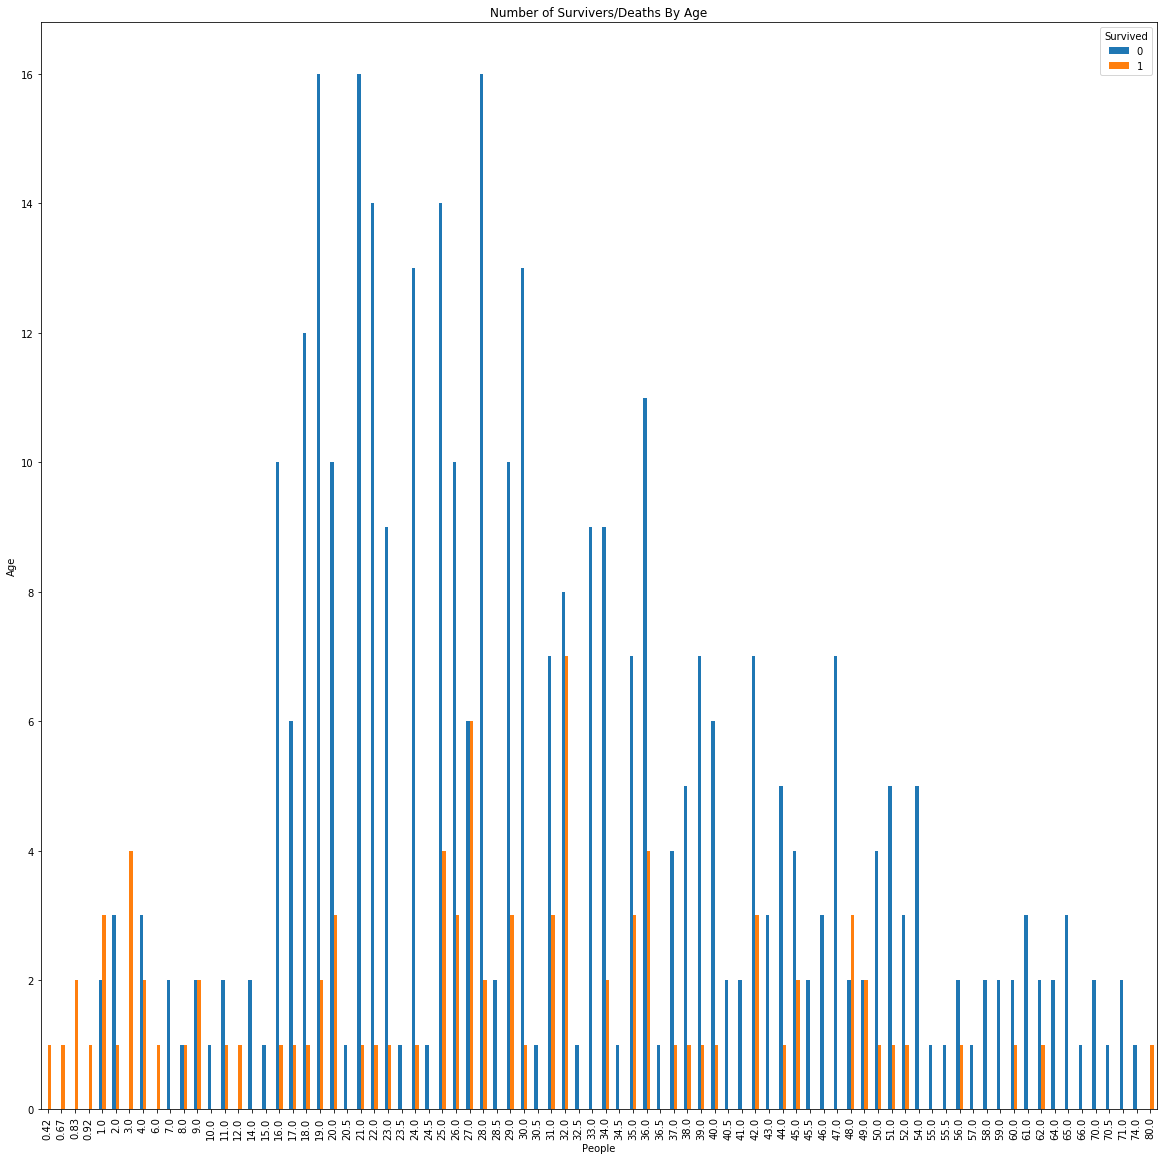

In [15]:
 pysqldf = lambda q: sqldf(q, globals())

q="""
select 
*
from titanic
where sex in ('male')
"""

males = pysqldf(q)

%matplotlib inline 

pd.crosstab(males['Age'],males['Survived']).plot(kind='bar', figsize=(20,20))

plt.title('Number of Survivers/Deaths By Age')

plt.xlabel('People')

plt.ylabel('Age')



Text(0,0.5,'Age')

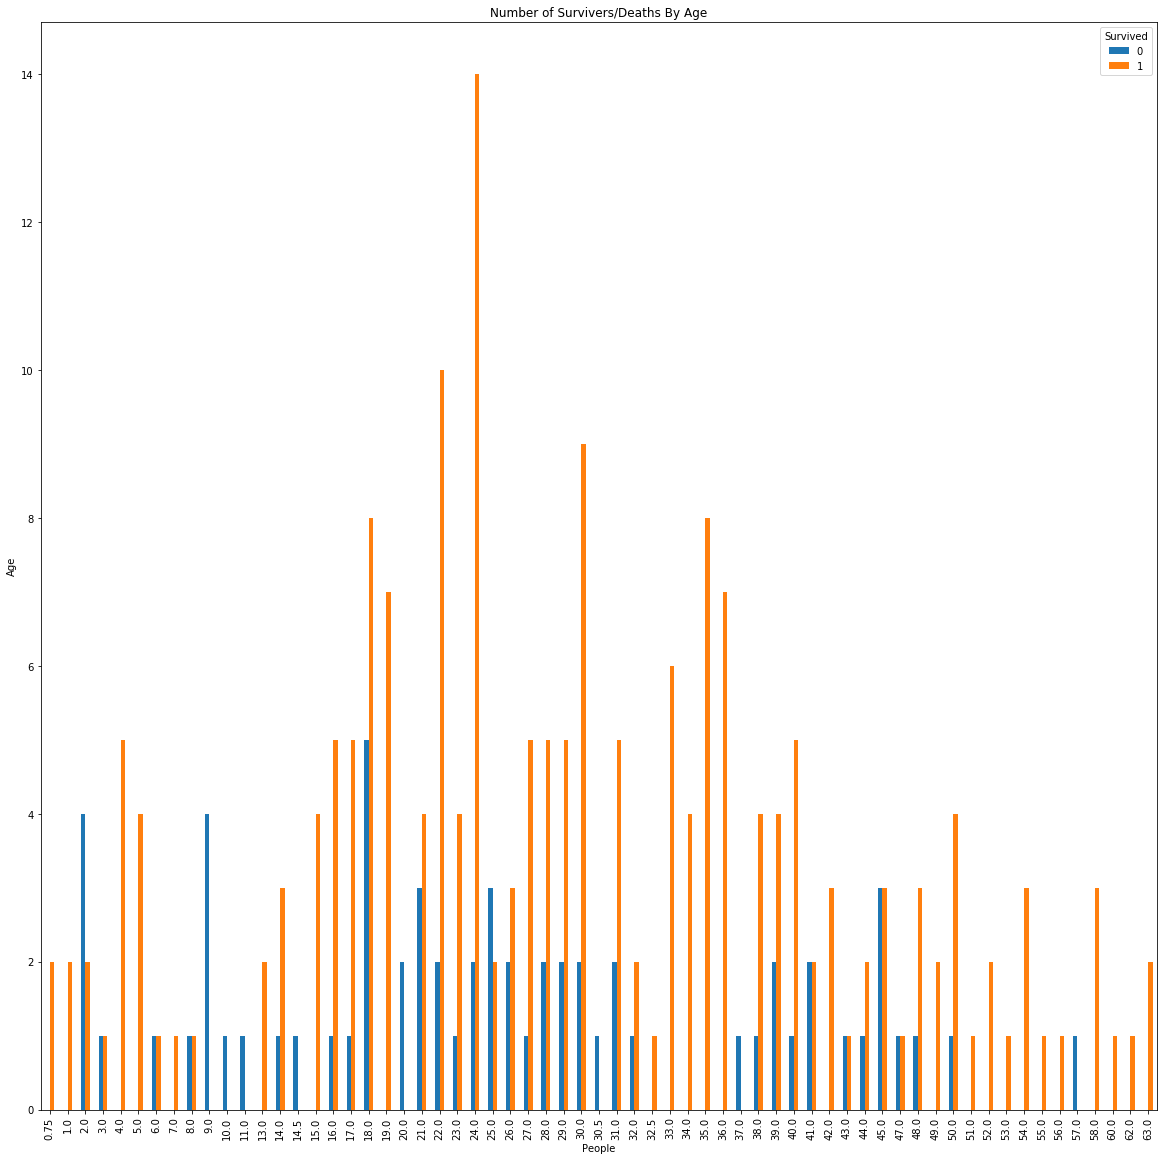

In [16]:
pysqldf = lambda q: sqldf(q, globals())

q="""
select 
*
from titanic
where sex in ('female')
"""

males = pysqldf(q)

%matplotlib inline 

pd.crosstab(males['Age'],males['Survived']).plot(kind='bar', figsize=(20,20))

plt.title('Number of Survivers/Deaths By Age')

plt.xlabel('People')

plt.ylabel('Age')

The drill down into gender still reveal what we suspected. I think we should bucket age into groups such as child, young adult, adult, and senior. 

Text(0,0.5,'Age')

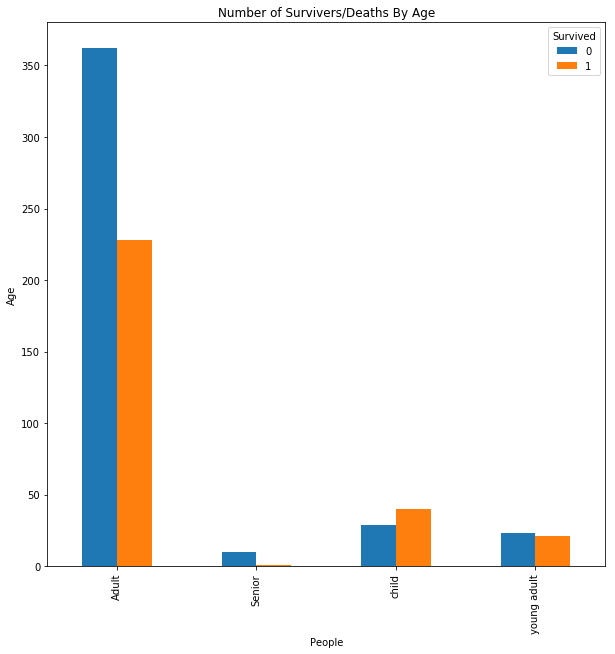

In [20]:
 pysqldf = lambda q: sqldf(q, globals())

q="""
select 
Survived,
Pclass, 
Sex,
case when Age<=12 then 'child'
when Age>12 and Age<18 then 'young adult'
when Age>=18 and Age<65 then 'Adult'
when Age>=65 then 'Senior' end as age,
SibSp,
Parch,
Ticket,
Fare,
Cabin,
Embarked
from titanic

"""

titanic2 = pysqldf(q)

%matplotlib inline 

pd.crosstab(titanic2['age'],titanic2['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Age')

plt.xlabel('People')

plt.ylabel('Age')

This is a much better story and I can see patterns emerge. I will ty using Age as a binned value or numerical variable when building models. We can see that children under the age of 12 have a greater survival rate. Young adults 12-18 have a slightly higher dath rate. seniors have a higher death rate but not as high as adults. I speculate that young adults had younger siblings and helped them board life craft. We can test this by considering the number of siblings variable. 

Text(0,0.5,'Age')

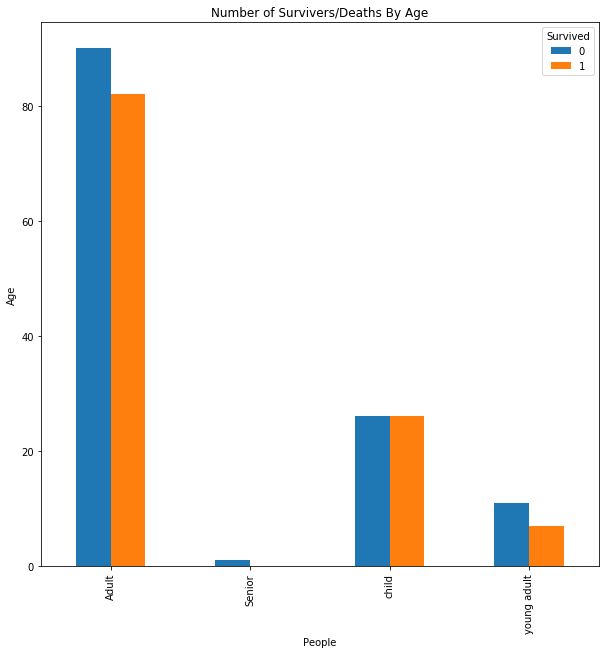

In [21]:
pysqldf = lambda q: sqldf(q, globals())

q="""
select 
Survived,
Pclass, 
Sex,
case when Age<=12 then 'child'
when Age>12 and Age<18 then 'young adult'
when Age>=18 and Age<65 then 'Adult'
when Age>=65 then 'Senior' end as age,
SibSp,
Parch,
Ticket,
Fare,
Cabin,
Embarked
from titanic
where SibSp>0

"""

titanic2 = pysqldf(q)

%matplotlib inline 

pd.crosstab(titanic2['age'],titanic2['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Age with At Least 1 Sibling')

plt.xlabel('People')

plt.ylabel('Age')

There seems to be an inverse relationship with number of young adults surviving with children given that they have at least one sibling. We can do correlation analysis but we leave that as a suggestion. Lets see the survival rates on everyone with a sibling as a whole.

Text(0,0.5,'Number of siblings')

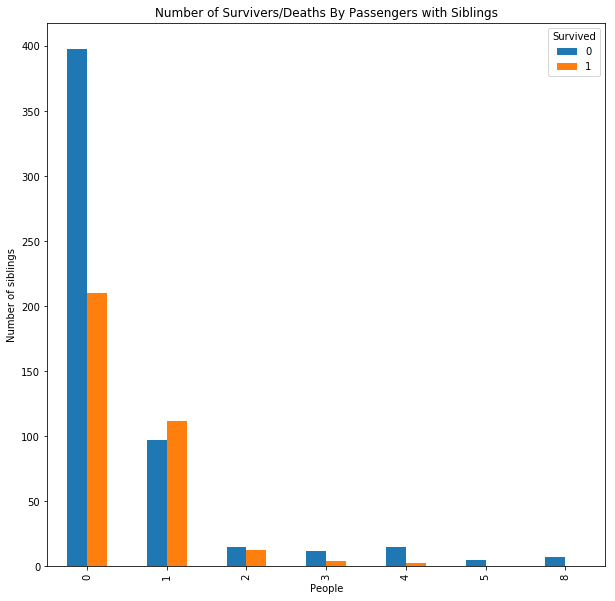

In [22]:
%matplotlib inline 

pd.crosstab(titanic['SibSp'],titanic['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Passengers with Siblings')

plt.xlabel('People')

plt.ylabel('Number of siblings')


It seems that having no siblings or more tha 1 sibling did not help the survival rate of passengers. We look at one more variable Parch, which is the number of parents with children. 

Text(0,0.5,'Number of Parents')

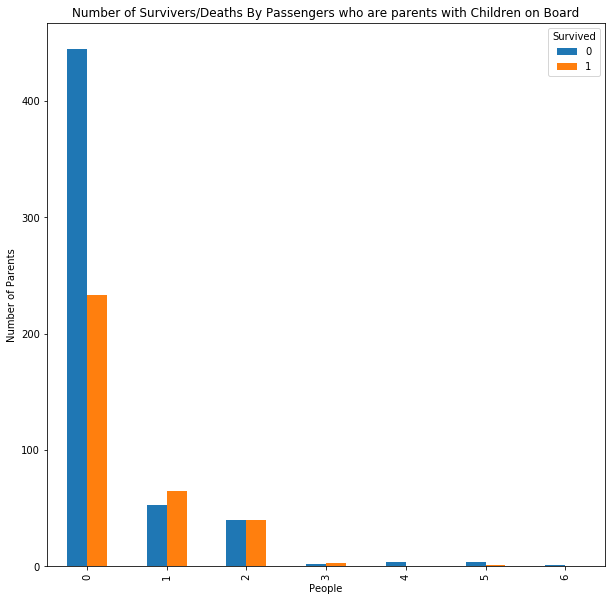

In [23]:
%matplotlib inline 

pd.crosstab(titanic['Parch'],titanic['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Passengers who are parents with Children on Board')

plt.xlabel('People')

plt.ylabel('Number of Parents')


It seems that parents with no children had a higher death rate. This could be due to the fact that children were given priority followed by the mother. Parents with one child had a higher survival rate but parents with more than one child had lower survival rates. 

Text(0,0.5,'port')

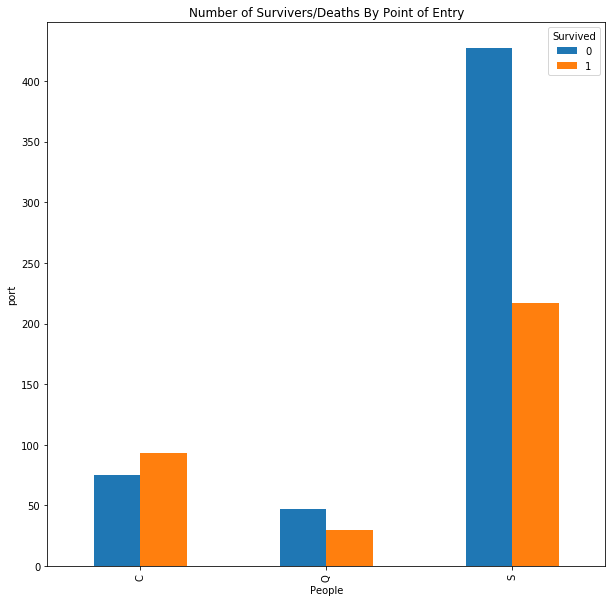

In [25]:
%matplotlib inline 

pd.crosstab(titanic['Embarked'],titanic['Survived']).plot(kind='bar', figsize=(10,10))

plt.title('Number of Survivers/Deaths By Point of Entry')

plt.xlabel('People')

plt.ylabel('port')

People who come from port Cherbourg have ahigher survival rate. 

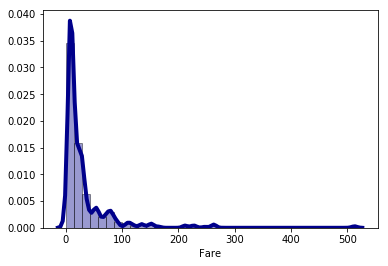

In [24]:
# Density Plot of fare paid
sns.distplot(titanic['Fare'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

our EDA has revealed that we should eliminate the Cabin variable since it is missing over 70% of the data. We can impute the remainder of the variables that are missing since they are well undernreath the threshold of missing variables. Fare could perhaps be transformed since there exists a right skew. Embarked has such a low percentage of missing data. I do not think it is worth imputing. We should impute age. 

We examined that the attribute age should be binned. We will perform feature engineering and data transforms in the train_model portion. 

### III) Train Model

This portion will deal with feature engineering and splitting the titanic data into a train and test. We also introduce one hot encoder to be able to dummify categorical values. 

In [50]:
##Eliminate variables such as passenger id, passenger name, Ticket and cabin
pysqldf = lambda q: sqldf(q, globals())

q="""
select 
Survived,
Pclass, 
Sex,
Age,
SibSp,
Parch,
Fare,
Embarked
from titanic
"""

titanic2 = pysqldf(q)




#create a copy with binned age instead
pysqldf = lambda q: sqldf(q, globals())

q="""
select 
Survived,
Pclass, 
Sex,
case when Age<=12 then 'child'
when Age>12 and Age<18 then 'young adult'
when Age>=18 and Age<65 then 'Adult'
when Age>=65 then 'Senior' end as age,
SibSp,
Parch,
Fare,
Embarked
from titanic2
"""

titanic3 = pysqldf(q)

titanic2.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
#Impute the age with the mean and Embarked with the mode and run one hot encoder on categorical variables

titanic2['Embarked'] = titanic2['Embarked'].fillna('S')

titanic2['Age'] = titanic2['Age'].fillna(titanic2.Age.mean())

ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

titanic2b = ohe.fit_transform(titanic2)

titanic2b.head()

,Survived,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,3,1,0,22.0,1,0,7.2500,1,0,0
1,1,1,0,1,38.0,1,0,71.2833,0,1,0
2,1,3,0,1,26.0,0,0,7.9250,1,0,0
3,1,1,0,1,35.0,1,0,53.1000,1,0,0
4,0,3,1,0,35.0,0,0,8.0500,1,0,0


In [69]:
#Prep the Data for Model 

#Prepping Data for Decision Tree
X=titanic2b.drop(columns='Survived')

Y=titanic2b['Survived'].copy() 

x_train, x_test, y_train, y_test=train_test_split(X, Y , test_size=0.2, random_state=100)

In [73]:
tree = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_depth = 10, n_estimators = 3000)

tree

tree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 408 to 520
Data columns (total 10 columns):
Pclass        712 non-null int64
Sex_male      712 non-null int64
Sex_female    712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Embarked_S    712 non-null int64
Embarked_C    712 non-null int64
Embarked_Q    712 non-null int64
dtypes: float64(2), int64(8)
memory usage: 61.2 KB


In [78]:
# save the model to disk
filename = 'randomforest.pkl'
pickle.dump(tree, open(filename, 'wb'))

# save the testset to disk
filename2 = 'testx.pkl'
pickle.dump(x_test, open(filename2, 'wb'))
filename22 = 'testy.pkl'
pickle.dump(y_test, open(filename22, 'wb'))

# save the trainset to disk
filename3 = 'trainx.pkl'
pickle.dump(x_train, open(filename3, 'wb'))
filename4 = 'trainy.pkl'
pickle.dump(y_train, open(filename4, 'wb'))

### IV) Score Model

In [79]:
pred_tree = tree.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report,precision_score

print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       104
           1       0.85      0.76      0.80        75

   micro avg       0.84      0.84      0.84       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



Current Model is 80% accurate. Lets see the confusion matrix. 

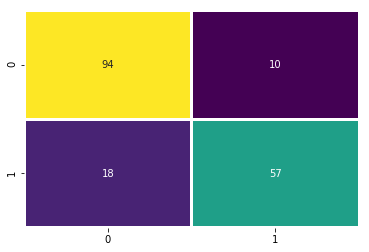

In [80]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,pred_tree),cmap="viridis",lw = 2,annot=True,cbar=False)

We correctly predict 57 passengers as survivors and 94 people as non survivers. We incorrectly predicted 10 non survivers as survivers and 18 survivers as non survivers. We makepredictions against the validation data. 